## Object Detection in Videos

In [1]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the COCO class names
with open('object_detection_classes_coco.txt', 'r') as f:
    class_names = f.read().split('\n')

# get a different color array for each of the classes
COLORS = np.random.uniform(0, 255, size=(len(class_names), 3))

# load the DNN model
model = cv2.dnn.readNet(model='frozen_inference_graph.pb',
                        config='ssd_mobilenet_v2_coco_2018_03_29.pbtxt.txt', 
                        framework='TensorFlow')


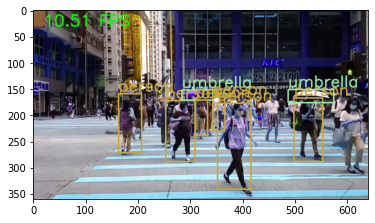

In [3]:
# capture the video
cap = cv2.VideoCapture('video_1.mp4')
# get the video frames' width and height for proper saving of videos
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
# create the `VideoWriter()` object
out = cv2.VideoWriter('video_result.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, 
                      (frame_width, frame_height))

# detect objects in each frame of the video
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        image = frame
        image_height, image_width, _ = image.shape
        # create blob from image
        blob = cv2.dnn.blobFromImage(image=image, size=(300, 300), mean=(104, 117, 123), 
                                     swapRB=True)
        # start time to calculate FPS
        start = time.time()
        model.setInput(blob)
        output = model.forward()        
        # end time after detection
        end = time.time()
        # calculate the FPS for current frame detection
        fps = 1 / (end-start)
        # loop over each of the detections
        for detection in output[0, 0, :, :]:
            # extract the confidence of the detection
            confidence = detection[2]
            # draw bounding boxes only if the detection confidence is above...
            # ... a certain threshold, else skip 
            if confidence > .4:
                # get the class id
                class_id = detection[1]
                # map the class id to the class 
                class_name = class_names[int(class_id)-1]
                color = COLORS[int(class_id)]
                # get the bounding box coordinates
                box_x = detection[3] * image_width
                box_y = detection[4] * image_height
                # get the bounding box width and height
                box_width = detection[5] * image_width
                box_height = detection[6] * image_height
                # draw a rectangle around each detected object
                cv2.rectangle(image, (int(box_x), int(box_y)), (int(box_width), int(box_height)), color, thickness=2)
                # put the class name text on the detected object
                cv2.putText(image, class_name, (int(box_x), int(box_y - 5)), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
                # put the FPS text on top of the frame
                cv2.putText(image, f"{fps:.2f} FPS", (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2) 
        
        plt.imshow(image)
        out.write(image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
#cv2.destroyAllWindows()